<a href="https://colab.research.google.com/github/EliseuODaniel/Analise_temperatura_motor_eletrico/blob/main/analise_3_Polynomial_Regression_with_normal_train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data and Setup

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/notebooks/input/measures_v2.csv')
# remoção da coluna torque, pois não servirá como variável nem de entrada e nem de saída
X = df[['ambient', 'coolant','i_q', 'u_q','i_d', 'u_d', 'motor_speed']]
y = df['pm']

#Polynomial conversion

In [3]:
from sklearn.preprocessing import PolynomialFeatures

regressão polinomial de grau 3 selecionada:

In [4]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [5]:
poly_features = polynomial_converter.fit_transform(X)

#Separação entre Datasets de treino e de teste

In [6]:
from sklearn.model_selection import train_test_split

X_train_poly_features, X_test_poly_features, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


a variável motor_speed cria resíduos distantes da média, como outliers. Talvez pela unidade da medida de velocidade. E que, ao ser multiplicada ao quadrado, gera valores maiores que os das outras unidades.

In [7]:
X_train_poly_features.shape

(931571, 119)

In [8]:
X_test_poly_features.shape

(399245, 119)

# Modeling

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train_poly_features,y_train)
test_predictions = model.predict(X_test_poly_features)

# Mensuração dos erros

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [11]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [12]:
MAE

4.745702075088555

In [13]:
MSE

52.65786342737679

In [14]:
RMSE

7.256573807753683

In [15]:
#valor médio das temperaturas do rotor em todo o dataset - para comparar com o RMSE
#ou seja, as previsões do modelo variam na media de 58,51 entre 9.25 para mais e para menos
df['pm'].mean()

58.50677585061459

Comparison with multiple linear regression  
MAE = 9.273602494057618  
MSE = 143.54079870823813  
RMSE = 11.980851334869243  

In [16]:
model.coef_

array([-1.98466857e+01,  3.86334563e+00,  5.37582512e-01, -8.54309283e+00,
        3.74064131e+00, -2.32176919e+00,  4.03834920e-01,  4.03238941e-01,
       -8.64629379e-02,  2.79107417e-04,  4.26872738e-01, -2.04387380e-01,
       -7.81756541e-02, -1.55919105e-02, -1.69754280e-02,  3.36776672e-04,
       -2.82436358e-02,  2.12633917e-03,  4.22163148e-02,  4.40502038e-05,
        8.77245753e-04, -6.59945527e-03,  6.23639831e-03, -2.23683097e-02,
       -1.22573915e-03, -4.31525985e-02,  2.02816745e-03, -1.58149916e-02,
        2.42741571e-03,  1.42702706e-02,  1.13305427e-02,  1.28444750e-03,
       -1.84580176e-03,  6.98752433e-04, -2.07500361e-05,  6.36432855e-03,
       -2.76035863e-03, -6.77241460e-04, -6.14682798e-03,  3.55343909e-03,
        1.41695608e-03,  9.37857075e-05,  1.05614543e-03,  6.91284308e-05,
        1.31993134e-03, -3.54599280e-04, -3.36684066e-04, -8.76017715e-06,
       -5.16431714e-06, -4.30543677e-04, -1.93700301e-04,  9.88898052e-05,
        3.61504129e-05, -

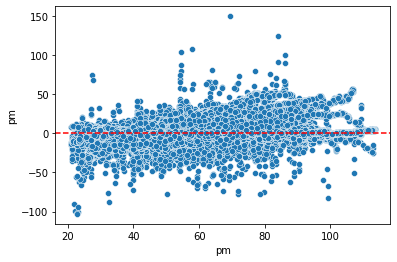

In [17]:
# plotagem da distribuição dos resíduos
test_res = y_test - test_predictions

sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

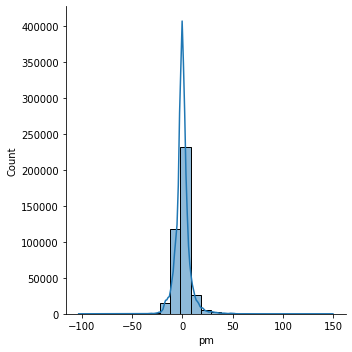

In [18]:
#plotagem da distribuição dos resíduos pra verificar visualmente a normalidade
sns.displot(test_res,bins=25,kde=True)

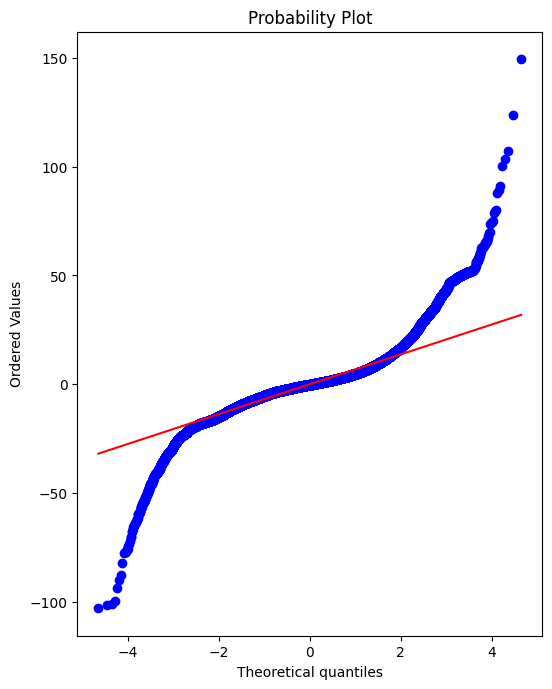

In [19]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

os resíduos distantes da normal devem-se à variável motor_speed como mencionado mais acima

In [20]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_poly_features)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 4.592e+04
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:36:02   Log-Likelihood:            -3.1706e+06
No. Observations:              931571   AIC:                         6.342e+06
Df Residuals:                  931452   BIC:                         6.343e+06
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.2747      9.736     19.954      0.000     175.193     213.357
x1           -19.8467      1.294    -15.342      0.000     -22.382     -17.311
x2             3.8633      0.115     33.466      0.000       3.637       4.090
x3             0.5376      0.037     14.541      0.000       0.465       0.610
x4            -8.5431      0.116    -73.939      0.000      -8.770      -8.317
x5             3.7406      0.075     50.042      0.000       3.594       3.887
x6            -2.3218      0.106    -21.849      0.000      -2.530      -2.113
x7             0.4038      0.006     73.237      0.000       0.393       0.415
x8             0.4032      0.058      6.964      0.000       0.290       0.517
x9            -0.0865      0.010     -9.071      0.000      -0.105      -0.068
x10            0.0003      0.003      0.094      0.925      -0.006       0.006
x11            0.4269      0.007     59.804      0.000       0.413       0.441
x12           -0.2044      0.005    -40.430      0.000      -0.214      -0.194
x13           -0.0782      0.006    -13.618      0.000      -0.089      -0.067
x14           -0.0156      0.000    -50.726      0.000      -0.016      -0.015
x15           -0.0170      0.000    -37.161      0.000      -0.018      -0.016
x16            0.0003      0.000      1.598      0.110   -7.64e-05       0.001
x17           -0.0282      0.001    -51.883      0.000      -0.029      -0.027
x18            0.0021      0.000      5.217      0.000       0.001       0.003
x19            0.0422      0.000     99.770      0.000       0.041       0.043
x20         4.405e-05   2.09e-05      2.105      0.035    3.04e-06    8.51e-05
x21            0.0009   7.78e-05     11.278      0.000       0.001       0.001
x22           -0.0066      0.001     -4.718      0.000      -0.009      -0.004
x23            0.0062      0.000     43.340      0.000       0.006       0.007
x24           -0.0224      0.000    -94.274      0.000      -0.023      -0.022
x25           -0.0012   6.75e-05    -18.147      0.000      -0.001      -0.001
x26           -0.0432      0.000    -91.053      0.000      -0.044      -0.042
x27            0.0020      0.001      2.992      0.003       0.001       0.003
x28           -0.0158      0.001    -29.447      0.000      -0.017      -0.015
x29            0.0024    2.8e-05     86.610      0.000       0.002       0.002
x30            0.0143      0.000     57.278      0.000       0.014       0.015
x31            0.0113      0.001     11.433      0.000       0.009       0.013
x32            0.0013   2.76e-05     46.607      0.000       0.001       0.001
x33           -0.0018      0.000     -5.288      0.000      -0.003      -0.001
x34            0.0007   1.66e-05     42.188      0.000       0.001       0.001
x35        -2.075e-05   4.75e-07    -43.710      0.000   -2.17e-05   -1.98e-05
x3

Ajustando os parâmetros

In [ ]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,4):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    X_train_poly_features = polynomial_converter.fit_transform(X_train_poly_features)
    X_test_poly_features = polynomial_converter.fit_transform(X_test_poly_features)

    # TRAIN ON THIS NEW POLY SET    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_poly_features,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train_poly_features)
    test_pred = model.predict(X_test_poly_features)
    
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [ ]:
train_rmse_errors

In [ ]:
test_rmse_errors

Baseado nos valores, percebe-se que do polinômio de grau 2 para o 3 há relativa estabilização do erro no teste e do 3 para o 4, o erro do teste começa a subir, enquanto o erro do treino continua a decrescer.  
Considerando o aumento de computação necessária do polinômio de grau 2 para o 3 e também o aumento do erro posterior, escolhe-se manter o grau 2. Embora, no teste de OLS de regressão, o R^2 de uma regressão polinomial de grau 3 é de 87%, enquanto de grau 2 é de 78.8%.

In [ ]:
plt.plot(range(1,5),train_rmse_errors,label='TRAIN')
plt.plot(range(1,5),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()